<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/books_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

from sklearn.metrics import mean_squared_error

In [6]:
#books = pd.read_csv('/content/drive/MyDrive/Label_Master Forecasting Datasets/Books_ext_fs.csv')
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
sales

,Year_Month,Sum of Sales
0,2008-01,282604.11
1,2008-02,262474.40
2,2008-03,326059.68
3,2008-04,215387.49
4,2008-05,499559.90
...,...,...
150,2020-07,150348.10
151,2020-08,156066.95
152,2020-09,468710.96
153,2020-10,1118446.80


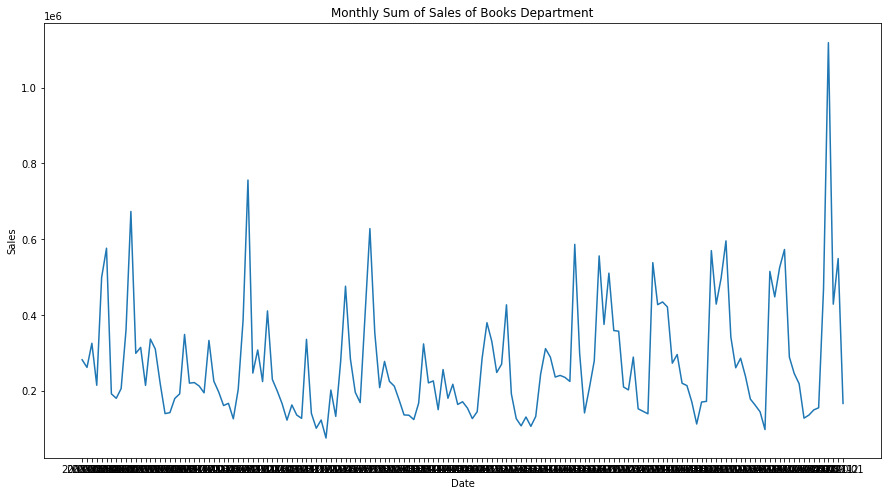

In [ ]:
plt.figure(figsize=[15,8])
plt.plot(sales['Year_Month'],sales['Sum of Sales'])
plt.title('Monthly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
ad_fuller_result = adfuller(sales['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.7635022193943355
p-value: 0.06367930284184517


Since the p-value is greater than 0.5, we cannot reject null hypothesis and must assume that the series is not stationary.

In [ ]:
sales['sales_diffed'] = sales['Sum of Sales'].diff(1)
sales

,Year_Month,Sum of Sales,sales_diffed
0,2008-01,282604.11,NaN
1,2008-02,262474.40,-20129.71
2,2008-03,326059.68,63585.28
3,2008-04,215387.49,-110672.19
4,2008-05,499559.90,284172.41
...,...,...,...
152,2020-09,468710.96,312644.01
153,2020-10,1118446.80,649735.84
154,2020-11,429166.77,-689280.03
155,2020-12,549415.01,120248.24


In [ ]:
ad_fuller_result = adfuller(sales['sales_diffed'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.778944752109984
p-value: 5.179955882440493e-07


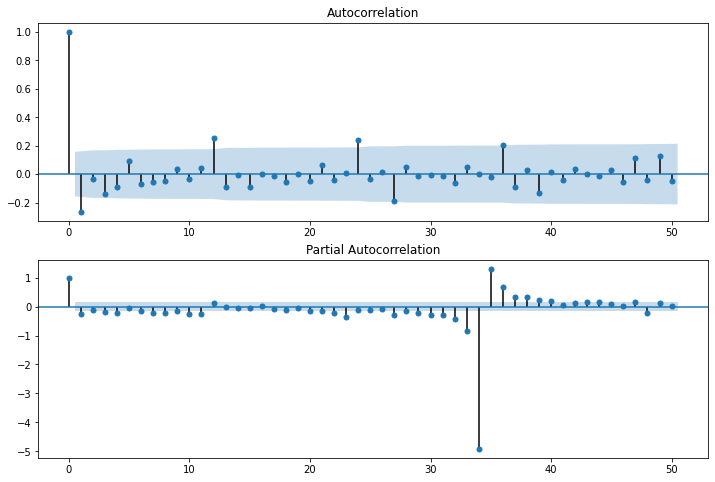

In [ ]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(sales['sales_diffed'][1:], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(sales['sales_diffed'][1:], lags=50, ax=ax[1])
plt.show()

# New Section

In [ ]:
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales['Sum of Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 1, 0)x(0, 1, 0, 12)- AIC:3861.4198757860204
 
ARIMA(0, 1, 0)x(0, 1, 1, 12)- AIC:3497.6736490320413
 
ARIMA(0, 1, 0)x(0, 1, 2, 12)- AIC:3176.936974534053
 
ARIMA(0, 1, 0)x(0, 1, 3, 12)- AIC:8565.781059182842
 
ARIMA(0, 1, 0)x(1, 1, 0, 12)- AIC:3527.7289985992074
 
ARIMA(0, 1, 0)x(1, 1, 1, 12)- AIC:3497.9659964056586
 
ARIMA(0, 1, 0)x(1, 1, 2, 12)- AIC:3176.1152141582843
 
ARIMA(0, 1, 0)x(1, 1, 3, 12)- AIC:8583.097738413173
 
ARIMA(0, 1, 0)x(2, 1, 0, 12)- AIC:3196.3556056769257
 
ARIMA(0, 1, 0)x(2, 1, 1, 12)- AIC:3197.018790787999
 
ARIMA(0, 1, 0)x(2, 1, 2, 12)- AIC:3174.685949329148
 
ARIMA(0, 1, 0)x(2, 1, 3, 12)- AIC:8672.852181119995
 
ARIMA(0, 1, 0)x(3, 1, 0, 12)- AIC:2883.7144755994805
 
ARIMA(0, 1, 0)x(3, 1, 1, 12)- AIC:2885.442959978349
 
ARIMA(0, 1, 0)x(3, 1, 2, 12)- AIC:2887.734047937116
 
ARIMA(0, 1, 1)x(0, 1, 0, 12)- AIC:3810.7288562963918
 
ARIMA(0, 1, 1)x(0, 1, 1, 12)- AIC:3455.090454742982
 
ARIMA(0, 1, 1)x(0, 1, 2, 12)- AIC:3137.398411682222
 
ARIMA(0, 1, 1)x(0, 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(0, 1, 2)x(0, 1, 0, 12)- AIC:3783.153839437005
 
ARIMA(0, 1, 2)x(0, 1, 1, 12)- AIC:3422.563692729486
 
ARIMA(0, 1, 2)x(0, 1, 2, 12)- AIC:3104.591342054657
 
ARIMA(0, 1, 2)x(0, 1, 3, 12)- AIC:8404.068872769976
 
ARIMA(0, 1, 2)x(1, 1, 0, 12)- AIC:3500.391994574642
 
ARIMA(0, 1, 2)x(1, 1, 1, 12)- AIC:3422.191838962467
 
ARIMA(0, 1, 2)x(1, 1, 2, 12)- AIC:3106.2059132342765
 
ARIMA(0, 1, 2)x(1, 1, 3, 12)- AIC:8421.210698939267
 
ARIMA(0, 1, 2)x(2, 1, 0, 12)- AIC:3182.0663119262263
 
ARIMA(0, 1, 2)x(2, 1, 1, 12)- AIC:3184.0447106569445
 
ARIMA(0, 1, 2)x(2, 1, 2, 12)- AIC:3106.6578027829496
 
ARIMA(0, 1, 2)x(2, 1, 3, 12)- AIC:8512.596563761921
 
ARIMA(0, 1, 2)x(3, 1, 0, 12)- AIC:2867.501191810145
 
ARIMA(0, 1, 2)x(3, 1, 1, 12)- AIC:2868.1743312791177
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(3, 1, 2, 12)- AIC:2868.4789490352414
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(0, 1, 3)x(0, 1, 0, 12)- AIC:3744.513697219933
 
ARIMA(0, 1, 3)x(0, 1, 1, 12)- AIC:3391.9059503101316
 
ARIMA(0, 1, 3)x(0, 1, 2, 12)- AIC:3075.018453134821
 
ARIMA(0, 1, 3)x(0, 1, 3, 12)- AIC:8319.294708836023
 
ARIMA(0, 1, 3)x(1, 1, 0, 12)- AIC:3497.1682219884333
 
ARIMA(0, 1, 3)x(1, 1, 1, 12)- AIC:3391.5207237742834
 
ARIMA(0, 1, 3)x(1, 1, 2, 12)- AIC:3076.8311621861844
 
ARIMA(0, 1, 3)x(1, 1, 3, 12)- AIC:8336.29232713704
 
ARIMA(0, 1, 3)x(2, 1, 0, 12)- AIC:3178.0418354796375
 
ARIMA(0, 1, 3)x(2, 1, 1, 12)- AIC:3180.034331058164
 
ARIMA(0, 1, 3)x(2, 1, 2, 12)- AIC:3078.0965149181566
 
ARIMA(0, 1, 3)x(2, 1, 3, 12)- AIC:8426.826898009002
 
ARIMA(0, 1, 3)x(3, 1, 0, 12)- AIC:2864.2776744402963
 
ARIMA(0, 1, 3)x(3, 1, 1, 12)- AIC:2864.916046803627
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 1, 2, 12)- AIC:2865.4404032801963
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(1, 1, 0)x(0, 1, 0, 12)- AIC:3846.9486593833685
 
ARIMA(1, 1, 0)x(0, 1, 1, 12)- AIC:3489.949137802938
 
ARIMA(1, 1, 0)x(0, 1, 2, 12)- AIC:3170.771401169127
 
ARIMA(1, 1, 0)x(0, 1, 3, 12)- AIC:8573.8658734773
 
ARIMA(1, 1, 0)x(1, 1, 0, 12)- AIC:3493.3699053944406
 
ARIMA(1, 1, 0)x(1, 1, 1, 12)- AIC:3491.3120190278496
 
ARIMA(1, 1, 0)x(1, 1, 2, 12)- AIC:3172.160963181104
 
ARIMA(1, 1, 0)x(1, 1, 3, 12)- AIC:8591.296115383142
 
ARIMA(1, 1, 0)x(2, 1, 0, 12)- AIC:3170.467965335322
 
ARIMA(1, 1, 0)x(2, 1, 1, 12)- AIC:3172.4307741446296
 
ARIMA(1, 1, 0)x(2, 1, 2, 12)- AIC:3174.2037520100703
 
ARIMA(1, 1, 0)x(2, 1, 3, 12)- AIC:8684.384568107182
 
ARIMA(1, 1, 0)x(3, 1, 0, 12)- AIC:2857.854034796403
 
ARIMA(1, 1, 0)x(3, 1, 1, 12)- AIC:2859.821104001995
 
ARIMA(1, 1, 0)x(3, 1, 2, 12)- AIC:2860.9023710736365
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(3, 1, 3, 12)- AIC:8476.307795479626
 
ARIMA(1, 1, 1)x(0, 1, 0, 12)- AIC:3805.209772712227
 
ARIMA(1, 1, 1)x(0, 1, 1, 12)- AIC:3449.209710564247
 
ARIMA(1, 1, 1)x(0, 1, 2, 12)- AIC:3131.298275882623
 
ARIMA(1, 1, 1)x(0, 1, 3, 12)- AIC:8488.294196510886
 
ARIMA(1, 1, 1)x(1, 1, 0, 12)- AIC:3474.954091855775
 
ARIMA(1, 1, 1)x(1, 1, 1, 12)- AIC:3449.032854860307
 
ARIMA(1, 1, 1)x(1, 1, 2, 12)- AIC:3133.0189049042037
 
ARIMA(1, 1, 1)x(1, 1, 3, 12)- AIC:8505.580230548458
 
ARIMA(1, 1, 1)x(2, 1, 0, 12)- AIC:3156.0916747710976
 
ARIMA(1, 1, 1)x(2, 1, 1, 12)- AIC:3158.0613861165307
 
ARIMA(1, 1, 1)x(2, 1, 2, 12)- AIC:3132.337035430581
 
ARIMA(1, 1, 1)x(2, 1, 3, 12)- AIC:8597.817389321805
 
ARIMA(1, 1, 1)x(3, 1, 0, 12)- AIC:2841.6520976342176
 
ARIMA(1, 1, 1)x(3, 1, 1, 12)- AIC:2841.9873474980195
 
ARIMA(1, 1, 1)x(3, 1, 2, 12)- AIC:2842.7668472450678
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(1, 1, 2)x(0, 1, 0, 12)- AIC:3780.951649143918
 
ARIMA(1, 1, 2)x(0, 1, 1, 12)- AIC:3423.1918287210856
 
ARIMA(1, 1, 2)x(0, 1, 2, 12)- AIC:3105.290907517412
 
ARIMA(1, 1, 2)x(0, 1, 3, 12)- AIC:8405.848984711203
 
ARIMA(1, 1, 2)x(1, 1, 0, 12)- AIC:3475.1435153276943
 
ARIMA(1, 1, 2)x(1, 1, 1, 12)- AIC:3423.013582945282
 
ARIMA(1, 1, 2)x(1, 1, 2, 12)- AIC:3107.001299483107
 
ARIMA(1, 1, 2)x(1, 1, 3, 12)- AIC:8422.990810880501
 
ARIMA(1, 1, 2)x(2, 1, 0, 12)- AIC:3156.307699336945
 
ARIMA(1, 1, 2)x(2, 1, 1, 12)- AIC:3158.2756078389157
 
ARIMA(1, 1, 2)x(2, 1, 2, 12)- AIC:3106.3342258655166
 
ARIMA(1, 1, 2)x(2, 1, 3, 12)- AIC:8514.376675703154
 
ARIMA(1, 1, 2)x(3, 1, 0, 12)- AIC:2842.0647256107636
 
ARIMA(1, 1, 2)x(3, 1, 1, 12)- AIC:2842.3348333629497
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 1, 2, 12)- AIC:2843.038669443673
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(1, 1, 3)x(0, 1, 0, 12)- AIC:3746.5080372300654
 
ARIMA(1, 1, 3)x(0, 1, 1, 12)- AIC:3393.5134724770805
 
ARIMA(1, 1, 3)x(0, 1, 2, 12)- AIC:3076.865146161656
 
ARIMA(1, 1, 3)x(0, 1, 3, 12)- AIC:8321.148307537806
 
ARIMA(1, 1, 3)x(1, 1, 0, 12)- AIC:3472.781197668655
 
ARIMA(1, 1, 3)x(1, 1, 1, 12)- AIC:3393.1653668936647
 
ARIMA(1, 1, 3)x(1, 1, 2, 12)- AIC:3078.6817231833165
 
ARIMA(1, 1, 3)x(1, 1, 3, 12)- AIC:8338.145925838817
 
ARIMA(1, 1, 3)x(2, 1, 0, 12)- AIC:3154.253047269452
 
ARIMA(1, 1, 3)x(2, 1, 1, 12)- AIC:3156.2510743845114
 
ARIMA(1, 1, 3)x(2, 1, 2, 12)- AIC:3080.0301329043614
 
ARIMA(1, 1, 3)x(2, 1, 3, 12)- AIC:8428.680496710776
 
ARIMA(1, 1, 3)x(3, 1, 0, 12)- AIC:2840.2951551484516
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 1, 12)- AIC:2840.8903254297484
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 2, 12)- AIC:2841.4835205531335
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(2, 1, 0)x(0, 1, 0, 12)- AIC:3819.583692826951
 
ARIMA(2, 1, 0)x(0, 1, 1, 12)- AIC:3489.6788586627254
 
ARIMA(2, 1, 0)x(0, 1, 2, 12)- AIC:3170.8518704261965
 
ARIMA(2, 1, 0)x(0, 1, 3, 12)- AIC:8573.988701866654
 
ARIMA(2, 1, 0)x(1, 1, 0, 12)- AIC:3466.9798726318168
 
ARIMA(2, 1, 0)x(1, 1, 1, 12)- AIC:3464.899167260006
 
ARIMA(2, 1, 0)x(1, 1, 2, 12)- AIC:3172.436241425284
 
ARIMA(2, 1, 0)x(1, 1, 3, 12)- AIC:8591.418943772504
 
ARIMA(2, 1, 0)x(2, 1, 0, 12)- AIC:3144.357506310221
 
ARIMA(2, 1, 0)x(2, 1, 1, 12)- AIC:3146.2922871218298
 
ARIMA(2, 1, 0)x(2, 1, 2, 12)- AIC:3148.160284003944
 
ARIMA(2, 1, 0)x(2, 1, 3, 12)- AIC:8684.507396496536
 
ARIMA(2, 1, 0)x(3, 1, 0, 12)- AIC:2830.803084174832
 
ARIMA(2, 1, 0)x(3, 1, 1, 12)- AIC:2832.7846618832928
 
ARIMA(2, 1, 0)x(3, 1, 2, 12)- AIC:2834.4136962696643
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(2, 1, 1)x(0, 1, 0, 12)- AIC:3806.2705495036453
 
ARIMA(2, 1, 1)x(0, 1, 1, 12)- AIC:3472.225116889988
 
ARIMA(2, 1, 1)x(0, 1, 2, 12)- AIC:3132.1456236394292
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 1, 3, 12)- AIC:8597.028051064884
 
ARIMA(2, 1, 1)x(1, 1, 0, 12)- AIC:3449.8513983321236
 
ARIMA(2, 1, 1)x(1, 1, 1, 12)- AIC:3469.848025890243
 
ARIMA(2, 1, 1)x(1, 1, 2, 12)- AIC:3133.856521461872
 
ARIMA(2, 1, 1)x(1, 1, 3, 12)- AIC:8614.05356255232
 
ARIMA(2, 1, 1)x(2, 1, 0, 12)- AIC:3131.081946955672
 
ARIMA(2, 1, 1)x(2, 1, 1, 12)- AIC:3133.0536924300927
 
ARIMA(2, 1, 1)x(2, 1, 2, 12)- AIC:3133.0224912409994
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 3, 12)- AIC:nan
 
ARIMA(2, 1, 1)x(3, 1, 0, 12)- AIC:2824.9434568665474
 
ARIMA(2, 1, 1)x(3, 1, 1, 12)- AIC:2824.9842691947297
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(3, 1, 2, 12)- AIC:2827.183477494412
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(2, 1, 2)x(0, 1, 0, 12)- AIC:3781.246304696928
 
ARIMA(2, 1, 2)x(0, 1, 1, 12)- AIC:3424.1585547308523
 
ARIMA(2, 1, 2)x(0, 1, 2, 12)- AIC:3106.8776957268133
 
ARIMA(2, 1, 2)x(0, 1, 3, 12)- AIC:8407.7232983925
 
ARIMA(2, 1, 2)x(1, 1, 0, 12)- AIC:3450.795301023938
 
ARIMA(2, 1, 2)x(1, 1, 1, 12)- AIC:3424.4310217481134
 
ARIMA(2, 1, 2)x(1, 1, 2, 12)- AIC:3108.605995061921
 
ARIMA(2, 1, 2)x(1, 1, 3, 12)- AIC:8424.865124561788
 
ARIMA(2, 1, 2)x(2, 1, 0, 12)- AIC:3132.2884333395414
 
ARIMA(2, 1, 2)x(2, 1, 1, 12)- AIC:3134.2768096854193
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12)- AIC:3098.6152680160726
 
ARIMA(2, 1, 2)x(2, 1, 3, 12)- AIC:8516.25098938444
 
ARIMA(2, 1, 2)x(3, 1, 0, 12)- AIC:2814.6821141584533
 
ARIMA(2, 1, 2)x(3, 1, 1, 12)- AIC:2816.6797366465844
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 2, 12)- AIC:2815.6065243995363
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(2, 1, 3)x(0, 1, 0, 12)- AIC:3745.1849620864764
 
ARIMA(2, 1, 3)x(0, 1, 1, 12)- AIC:3392.9359838586097
 
ARIMA(2, 1, 3)x(0, 1, 2, 12)- AIC:3075.5369264879514
 
ARIMA(2, 1, 3)x(0, 1, 3, 12)- AIC:8319.844217826361
 
ARIMA(2, 1, 3)x(1, 1, 0, 12)- AIC:3446.701846282994
 
ARIMA(2, 1, 3)x(1, 1, 1, 12)- AIC:3392.34247649414
 
ARIMA(2, 1, 3)x(1, 1, 2, 12)- AIC:3077.3094251557004
 
ARIMA(2, 1, 3)x(1, 1, 3, 12)- AIC:8336.841836127376
 
ARIMA(2, 1, 3)x(2, 1, 0, 12)- AIC:3127.9222805580944
 
ARIMA(2, 1, 3)x(2, 1, 1, 12)- AIC:3129.729128827238
 
ARIMA(2, 1, 3)x(2, 1, 2, 12)- AIC:3079.180580843706
 
ARIMA(2, 1, 3)x(2, 1, 3, 12)- AIC:8427.376406999338
 
ARIMA(2, 1, 3)x(3, 1, 0, 12)- AIC:2809.478913984705
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 1, 12)- AIC:2810.9471776345376
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 2, 12)- AIC:2809.297192475226
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(3, 1, 0)x(0, 1, 0, 12)- AIC:3786.838785607868
 
ARIMA(3, 1, 0)x(0, 1, 1, 12)- AIC:3484.7110680426135
 
ARIMA(3, 1, 0)x(0, 1, 2, 12)- AIC:3167.1396280447925
 
ARIMA(3, 1, 0)x(0, 1, 3, 12)- AIC:8570.002253701916
 
ARIMA(3, 1, 0)x(1, 1, 0, 12)- AIC:3436.1945453824537
 
ARIMA(3, 1, 0)x(1, 1, 1, 12)- AIC:3433.978669323742
 
ARIMA(3, 1, 0)x(1, 1, 2, 12)- AIC:3168.626305984429
 
ARIMA(3, 1, 0)x(1, 1, 3, 12)- AIC:8587.432495607767
 
ARIMA(3, 1, 0)x(2, 1, 0, 12)- AIC:3114.5148722562335
 
ARIMA(3, 1, 0)x(2, 1, 1, 12)- AIC:3116.326760335602
 
ARIMA(3, 1, 0)x(2, 1, 2, 12)- AIC:3118.2456857519933
 
ARIMA(3, 1, 0)x(2, 1, 3, 12)- AIC:8680.520948331803
 
ARIMA(3, 1, 0)x(3, 1, 0, 12)- AIC:2801.2337544940615
 
ARIMA(3, 1, 0)x(3, 1, 1, 12)- AIC:2803.170745222802
 
ARIMA(3, 1, 0)x(3, 1, 2, 12)- AIC:2804.7653341491823
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(3, 1, 1)x(0, 1, 0, 12)- AIC:3784.4433242681303
 
ARIMA(3, 1, 1)x(0, 1, 1, 12)- AIC:3450.3619947878688
 
ARIMA(3, 1, 1)x(0, 1, 2, 12)- AIC:3132.7444266722455
 
ARIMA(3, 1, 1)x(0, 1, 3, 12)- AIC:8489.266658625154
 
ARIMA(3, 1, 1)x(1, 1, 0, 12)- AIC:3424.1367383311926
 
ARIMA(3, 1, 1)x(1, 1, 1, 12)- AIC:3423.998885748606
 
ARIMA(3, 1, 1)x(1, 1, 2, 12)- AIC:3134.386062911633
 
ARIMA(3, 1, 1)x(1, 1, 3, 12)- AIC:8506.55269266272
 
ARIMA(3, 1, 1)x(2, 1, 0, 12)- AIC:3105.8494565864416
 
ARIMA(3, 1, 1)x(2, 1, 1, 12)- AIC:3107.8432664787133
 
ARIMA(3, 1, 1)x(2, 1, 2, 12)- AIC:3108.330172013479
 
ARIMA(3, 1, 1)x(2, 1, 3, 12)- AIC:8598.789851436068
 
ARIMA(3, 1, 1)x(3, 1, 0, 12)- AIC:2788.021734734036
 
ARIMA(3, 1, 1)x(3, 1, 1, 12)- AIC:2787.8773755703633
 
ARIMA(3, 1, 1)x(3, 1, 2, 12)- AIC:2791.773192296788
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(3, 1, 2)x(0, 1, 0, 12)- AIC:3780.4070144568723
 
ARIMA(3, 1, 2)x(0, 1, 1, 12)- AIC:3423.8262980215477
 
ARIMA(3, 1, 2)x(0, 1, 2, 12)- AIC:3106.472158920055
 
ARIMA(3, 1, 2)x(0, 1, 3, 12)- AIC:8405.800114700342
 
ARIMA(3, 1, 2)x(1, 1, 0, 12)- AIC:3424.0587486046566
 
ARIMA(3, 1, 2)x(1, 1, 1, 12)- AIC:3423.791671941839
 
ARIMA(3, 1, 2)x(1, 1, 2, 12)- AIC:3108.0823216828485
 
ARIMA(3, 1, 2)x(1, 1, 3, 12)- AIC:8422.941940869638
 
ARIMA(3, 1, 2)x(2, 1, 0, 12)- AIC:3105.8118312178467
 
ARIMA(3, 1, 2)x(2, 1, 1, 12)- AIC:3107.805848757181
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 1, 2, 12)- AIC:3102.8128158214754
 
ARIMA(3, 1, 2)x(2, 1, 3, 12)- AIC:8514.327805692286
 
ARIMA(3, 1, 2)x(3, 1, 0, 12)- AIC:2787.958717208978
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 1, 12)- AIC:2789.2488534812155
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 2, 12)- AIC:2791.706306117145
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 3, 12)- AIC:nan
 
ARIMA(3, 1, 3)x(0, 1, 0, 12)- AIC:3745.3139936785387
 
ARIMA(3, 1, 3)x(0, 1, 1, 12)- AIC:3390.1739115256514
 
ARIMA(3, 1, 3)x(0, 1, 2, 12)- AIC:3075.9575747697904
 
ARIMA(3, 1, 3)x(0, 1, 3, 12)- AIC:8321.805827704695
 
ARIMA(3, 1, 3)x(1, 1, 0, 12)- AIC:3418.527097344321
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 1, 12)- AIC:3383.9993668410507
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 2, 12)- AIC:3071.462003968001
 
ARIMA(3, 1, 3)x(1, 1, 3, 12)- AIC:8338.8034460057
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 0, 12)- AIC:3095.6291134552084
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 1, 12)- AIC:3097.6394745108973
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 2, 12)- AIC:3073.337564729339
 
ARIMA(3, 1, 3)x(2, 1, 3, 12)- AIC:8429.338016877666
 
ARIMA(3, 1, 3)x(3, 1, 0, 12)- AIC:2784.6179382437226
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 1, 12)- AIC:2782.5878323049915
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 2, 12)- AIC:2785.6100608622028
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 3, 12)- AIC:nan
 


In [ ]:
df = df.sort_values('AIC').reset_index(drop= True)
df

,param,param_seasonal,AIC
0,"(3, 1, 3)","(3, 1, 1, 12)",2782.587832
1,"(3, 1, 3)","(3, 1, 0, 12)",2784.617938
2,"(3, 1, 3)","(3, 1, 2, 12)",2785.610061
3,"(3, 1, 1)","(3, 1, 1, 12)",2787.877376
4,"(3, 1, 2)","(3, 1, 0, 12)",2787.958717
...,...,...,...
250,"(2, 1, 3)","(3, 1, 3, 12)",NaN
251,"(3, 1, 0)","(3, 1, 3, 12)",NaN
252,"(3, 1, 1)","(3, 1, 3, 12)",NaN
253,"(3, 1, 2)","(3, 1, 3, 12)",NaN


The above output suggests that SARIMAX(3,1,3)(3,1,0,12) yields the lowest AIC value of 2272.586783. Therefore we should consider this to be the optimal option.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(sales['Sum of Sales'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 1, 12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  157
Model:             SARIMAX(3, 1, 3)x(3, 1, 1, 12)   Log Likelihood               -1900.297
Date:                            Tue, 09 Mar 2021   AIC                           3822.594
Time:                                    17:15:21   BIC                           3855.262
Sample:                                         0   HQIC                          3835.868
                                            - 157                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1243      0.175     -0.711      0.477      -0.467       0.218
ar.L2         -0.6317      0.180   

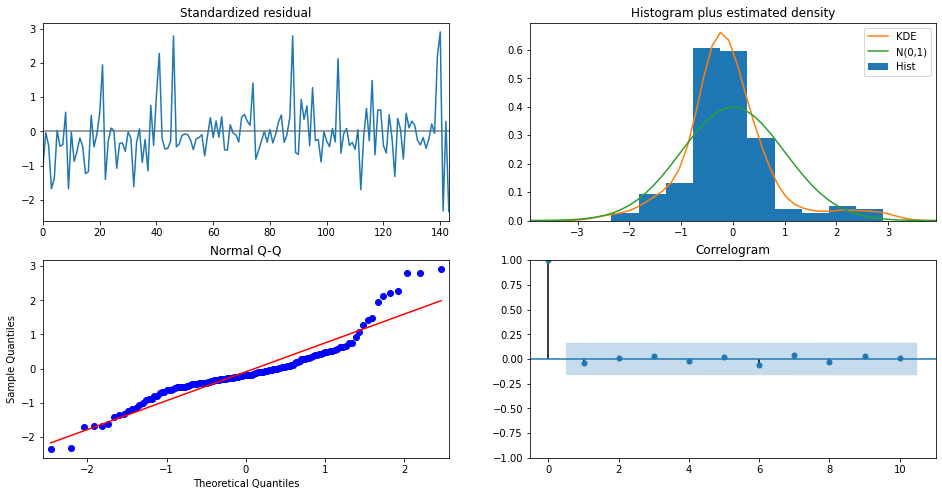

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Here we will forecast the values using the model. Can change starting point from which we need to forecast. For now we will keep starting point after 50 observations

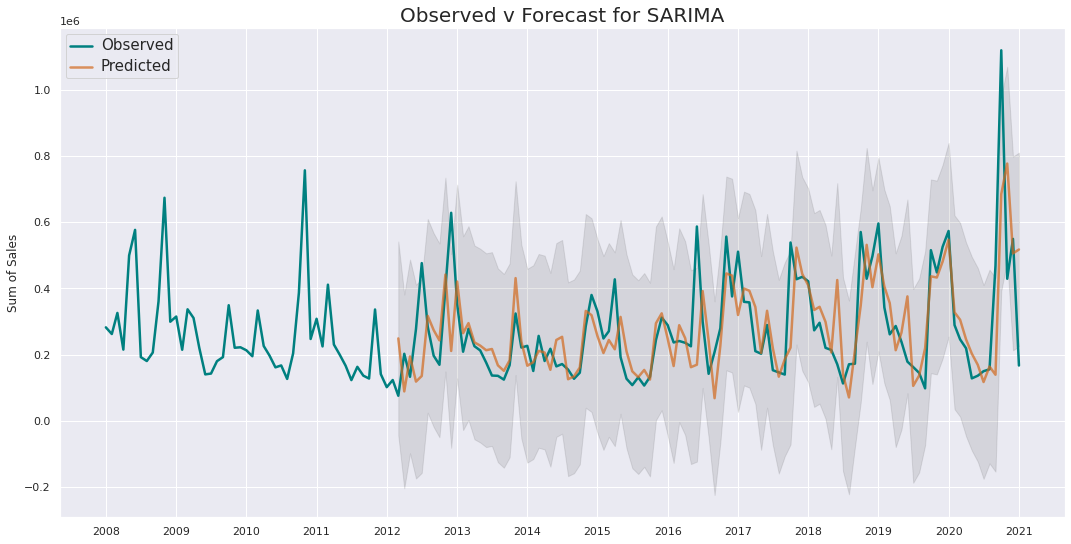

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

#Point from which prediction starts
start_point = 50
pred = results.get_prediction(start=start_point, dynamic=False)
pred_ci = pred.conf_int()
sale = sales['Sum of Sales']

#Convert Year_month to datetime object
date = [datetime.strptime(x, '%Y-%m') for x in sales.Year_Month]

# Plot Sales and forecast
sns.set(rc={'figure.figsize':(18,9)})
ax = sns.lineplot(x = date, y = sale, legend= "brief",label = "Observed",linewidth = 2.5, color = "teal")
sns.lineplot(x = date[start_point:], y = pred.predicted_mean, legend= "brief", label = "Predicted",linewidth = 2.5, color = "chocolate", alpha = 0.7)

# Confidence Interval
ax.fill_between(date[start_point:],
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.title("Observed v Forecast for SARIMA", fontsize='20')

# Update the interval of date frequency on X- Axis
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())


# Model Evaluation
### Forecast Bias
Forecast errors can be positive and negative. This means that when the average of these values is calculated, an ideal mean forecast error would be zero.
A mean forecast error value other than zero suggests a tendency of the model to over forecast (negative error) or under forecast (positive error).

In [ ]:
predictions = pred.predicted_mean
actual = sales['Sum of Sales'][start_point:]
error = predictions - actual
bias = sum(error)/len(error)
print(f'Bias: {bias}')

Bias: 2602.128508174175


Here we have a negative bias, meaning we over forecast. Lets look into other metrics for model evaulation

### MAE (Mean Absolute Error)
The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast error values are forced to be positive.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MAE = mean_absolute_error(actual,predictions)
print(f'Mean Absolute Error: {MAE}')

Mean Absolute Error: 79092.69257632927


### MSE (Mean Squared Error)
The mean squared error, or MSE, is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors.

In [ ]:
MSE = mean_squared_error(predictions,actual)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 14103898160.9868


### RMSE (Root Mean Squared Error)
The mean squared error described above is in the squared units of the predictions.

It can be transformed back into the original units of the predictions by taking the square root of the mean squared error score. This is called the root mean squared error, or RMSE.

In [ ]:
from math import sqrt
RMSE = sqrt(MSE)
print(f'Root Mean Squared Error: {RMSE}')

Root Mean Squared Error: 118759.83395486372


# Feature Importances Using Linear Regression
Find important features using sklearn linear regression. The model assumes that the data is scaled. Hence we need to check that condition first.

In [60]:
# Drop null values and create a new dataframe with external variables.
books = books.dropna(axis = 1)
exog = books.iloc[:,2:]
exog

,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking","New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicators_m_trucking",B50001_indicators_m_trucking,GMFN_indicators_m_trucking,G325_indicators_m_trucking,G332_indicators_m_trucking,ISM_indicators_m_trucking,PORTEU_indicators_m_trucking,MANEMP_indicators_m_trucking,USTRADE_indicators_m_trucking,LEI_indicators_m_trucking,SPREAD_indicators_m_trucking,D/GAL_indicators_m_trucking,D/STOCK_indicators_m_trucking,Change in Payroll Employment (000's)_driver_indicators_m_trucking,Change in Truck Emp. (000's)_driver_indicators_m_trucking,LABORINDEX_driver_indicators_m_trucking,"Total Class 8, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer","Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Carloadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Class 8 Truck Utilization (%, SA)_freight_m_trucking_trailer",BUILD FOR_Total_Trailer,BUILD FOR_Flatbed,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Po

In [15]:
#Seperate the target sales column from the dataframe to pass it to the model
Target = books["Sum of Sales"]
Target

0       282604.11
1       262474.40
2       326059.68
3       215387.49
4       499559.90
          ...    
150     150348.10
151     156066.95
152     468710.96
153    1118446.80
154     429166.77
Name: Sum of Sales, Length: 155, dtype: float64

Before we fit the data to regression model, we need to take a look at the variables and scale them.
We will use both scaling methods, 
- Normalization
- Standardization
Lets see how the data looks before scaling. The graph below shows that the scale for each parameter is quite variable and some features could be dominating in making the predictions due to this. Hence we need to scale the parameters first.

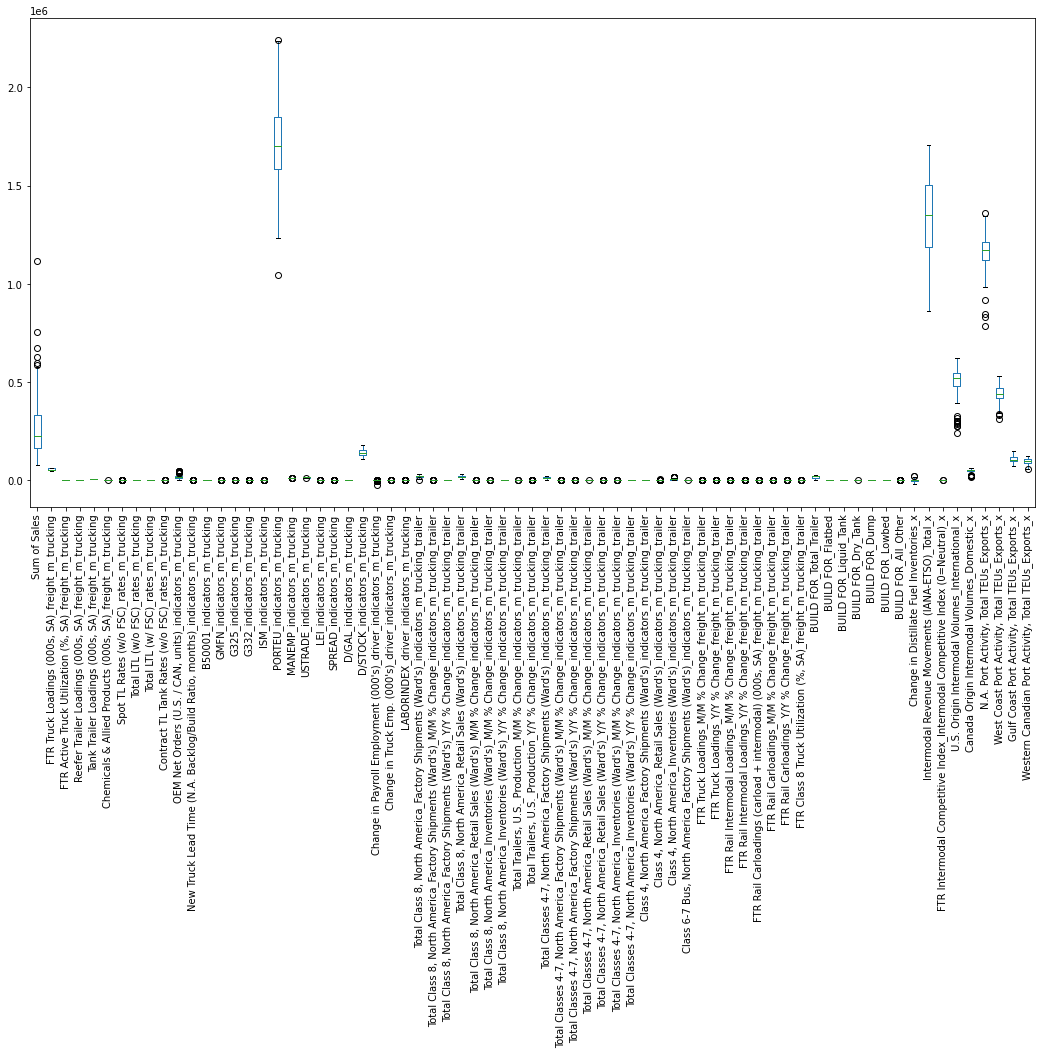

In [37]:
books.plot.box(figsize=(18, 9),rot=90)

#Scaling
### Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

After this, all the features will have a minimum value of 0 and a maximum value of 1.

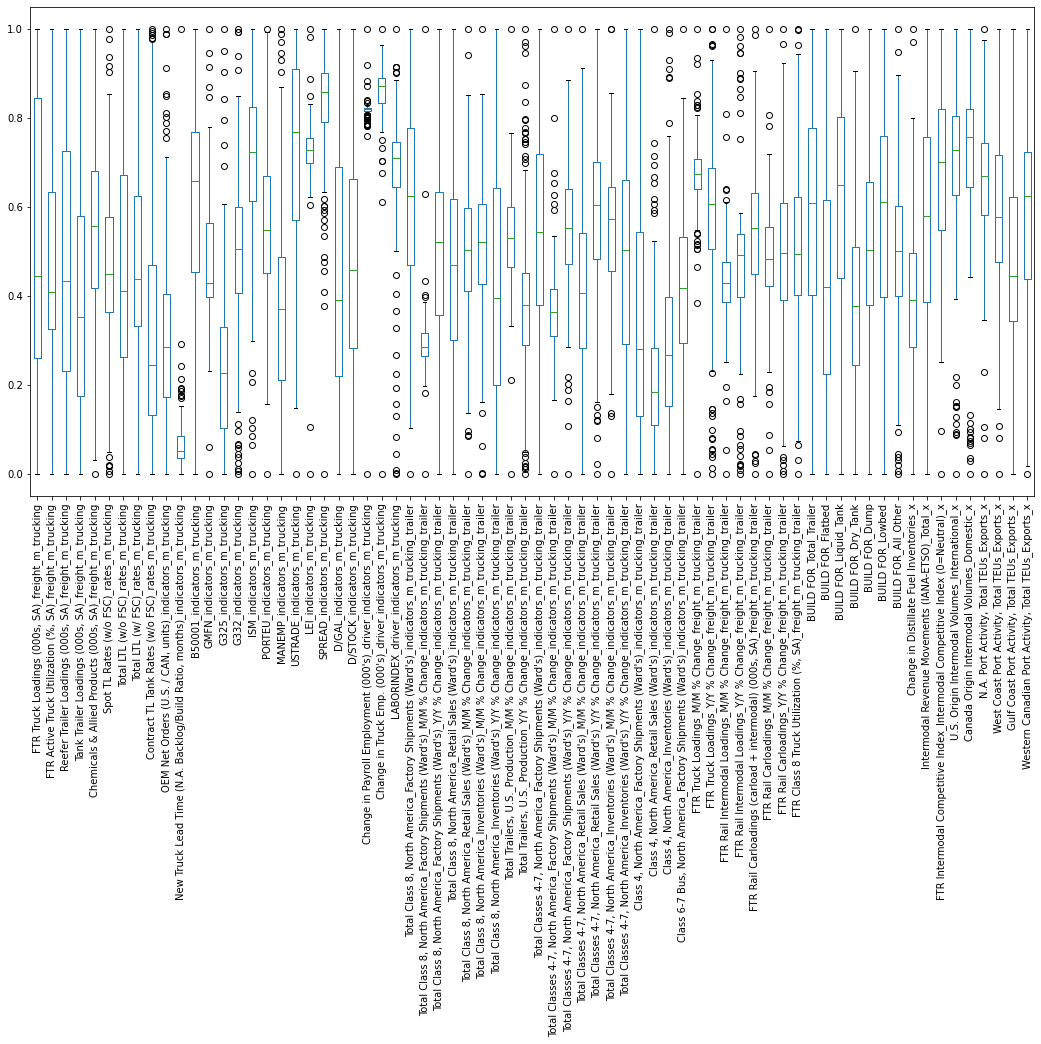

In [47]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(exog)
exog_norm = pd.DataFrame(norm.transform(exog),columns=exog.columns)
exog_norm.plot.box(figsize=(18, 9),rot=90)

Now lets implement feature importance using Linear Regression. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant.

Feature: 0, Score: -185649.36888
Feature: 1, Score: -182280.30636
Feature: 2, Score: 203486.08994
Feature: 3, Score: -18890.58071
Feature: 4, Score: 86595.65870
Feature: 5, Score: -4604.22081
Feature: 6, Score: -190012.87172
Feature: 7, Score: 659311.02353
Feature: 8, Score: 234144.18802
Feature: 9, Score: 163986.26196
Feature: 10, Score: 154886.03717
Feature: 11, Score: -756970.67703
Feature: 12, Score: -515514.38132
Feature: 13, Score: 709998.22845
Feature: 14, Score: 623159.02744
Feature: 15, Score: 88333.51472
Feature: 16, Score: -3793.31426
Feature: 17, Score: 436922.29512
Feature: 18, Score: 602364.79995
Feature: 19, Score: 59625.67606
Feature: 20, Score: -26074.00180
Feature: 21, Score: -749081.40332
Feature: 22, Score: 36232.42181
Feature: 23, Score: 625381.24470
Feature: 24, Score: -499019.51770
Feature: 25, Score: 833297.50679
Feature: 26, Score: 1242755.24646
Feature: 27, Score: -636739.65013
Feature: 28, Score: -356845.85971
Feature: 29, Score: -588785.70514
Feature: 30, Sc

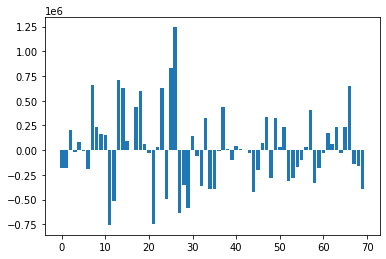

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(exog_norm,Target)
importance = model.coef_

imp_features_index = []
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
  if v>0:
    imp_features_index.append(i)
# plot feature importance
import matplotlib.pyplot as pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [61]:
len(exog_norm.columns)

70

In [62]:
exog.iloc[:,imp_features_index].columns

Index(['Reefer Trailer Loadings (000s, SA)_freight_m_trucking',
       'Chemicals & Allied Products (000s, SA)_freight_m_trucking',
       'Total LTL (w/ FSC)_rates_m_trucking',
       'Contract TL Tank Rates (w/o FSC)_rates_m_trucking',
       'OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking',
       'New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicators_m_trucking',
       'G325_indicators_m_trucking', 'G332_indicators_m_trucking',
       'ISM_indicators_m_trucking', 'MANEMP_indicators_m_trucking',
       'USTRADE_indicators_m_trucking', 'LEI_indicators_m_trucking',
       'D/STOCK_indicators_m_trucking',
       'Change in Payroll Employment (000's)_driver_indicators_m_trucking',
       'LABORINDEX_driver_indicators_m_trucking',
       'Total Class 8, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer',
       'Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer',
       'Total Trailers, U.S._Productio

The above columns are important as per the Linear Regression model to predict the outcome, Sum of Sales.